# Problem 1

In [831]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib as mp
import matplotlib.pyplot as plt

In [832]:
data = pd.read_csv("charlie.csv")

In [833]:
data.head()

,Data,x1,x2,x3,x4
0,1,10.0,20.7,13.6,15.5
1,1,10.5,19.9,18.1,14.8
2,1,9.7,20.0,16.1,16.5
3,1,9.8,20.2,19.1,17.1
4,1,11.7,21.5,19.8,18.3


In [834]:
x = np.array(data.iloc[:,1:5])#Columns x1,x2,x3,x4 in x as features
y = np.array(data.iloc[:,0])

In [835]:
sigma = 1
gamma = 0.6 #Value of C


In [836]:
def Kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x-y)**2 / ( (sigma ** 2)))

In [837]:
def Omega(x, y, sigma):
    length = len(x)
    omega = np.zeros((length, length))
    for i in range(length):
        for j in range(length):
            omega[i, j] = y[i] * y[j] * Kernel(x[i], x[j], sigma)
    return omega

In [838]:
def Classifier(x, y):
    para = Train(x, y, sigma, gamma)
    beta = para[0]
    alpha = para[1 : len(para)]
    return alpha, beta, para

In [839]:
def Train(x, y, sigma, gamma):
    length = len(x) + 1

    A = np.zeros((length, length))
    A[0][0] = 0
    A[0, 1:length] = y.T
    A[1:length, 0] = y
    A[1:length, 1:length] = Omega(x, y, sigma) + np.eye(length - 1) / gamma

    B = np.ones((length, 1))
    B[0][0] = 0
    return np.linalg.solve(A, B)

In [840]:
def Pred(x_test):
    preds = []
    temp_pred = []
    for i in range(len(x_test)):
        for j in range(len(X_train)):
            ans = alpha[j] * y_train[j] * Kernel(X_train[j], x_test[i], sigma)
            temp_pred.append(ans)
        preds.append(np.sum(temp_pred)+beta)
        temp_pred = []
    return preds, temp_pred

In [841]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)#Split the dataset into 75% for training and 25% for testing

In [842]:
alpha, beta, para = Classifier(X_train, y_train)

In [843]:
pred, test = Pred(X_test)

In [844]:
#Normalization
y_pred_vals = []
for i in range(0, len(pred)):
    deno = 0.9*(np.sign(pred[i])*(max(pred) + min(pred)) + (max(pred) - min(pred)))
    num = 2*(np.abs(pred[i]))
    yt = 1 - (num/deno)
    if yt>0:
        y_pred_vals.append(1)
    elif yt<0:
        y_pred_vals.append(-1)

In [845]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_pred_vals)

array([[0, 1],
       [1, 6]], dtype=int64)

In [846]:
f1_score(y_true = y_test, y_pred = y_pred_vals)
#This score shows the accuracy percentage of the predicted values when compared to original dataset.

0.8571428571428571

## Problem 2

In [847]:
data = pd.read_csv("charlie1.csv")

In [848]:
x = np.array(data.iloc[:,1:3])
y = np.array(data.iloc[:,0])

In [849]:
x

array([[ 0.291681, -0.6034  ],
       [ 0.294281,  0.491533],
       [ 0.197337,  0.640937],
       [ 0.839022,  1.469579],
       [ 3.204876,  0.879172],
       [ 0.203271, -2.29514 ],
       [-0.99211 ,  1.670464],
       [-1.70241 , -0.36089 ],
       [-0.14246 ,  0.560808],
       [-0.99498 , -0.31493 ],
       [ 0.944697,  0.504711],
       [-1.2195  , -0.09129 ],
       [ 2.608666, -0.42176 ],
       [-0.12378 , -0.08767 ],
       [-1.10423 ,  1.472593],
       [-0.27825 , -0.94763 ],
       [-2.65608 ,  0.135288],
       [ 2.36528 , -1.30494 ],
       [ 0.411311, -0.21893 ],
       [-2.14662 , -1.17849 ],
       [ 0.074196,  0.239359],
       [-1.51756 , -0.21121 ],
       [ 1.408476, -0.87591 ],
       [ 6.298001, -3.67398 ],
       [ 3.802025, -1.99584 ],
       [ 6.490673, -2.73143 ],
       [ 2.738829, -1.37617 ],
       [ 4.958747, -3.94851 ],
       [ 5.678092, -3.85838 ],
       [ 3.369657, -2.10878 ]])

In [850]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [851]:
x_out = x[21:]
y_out = y[21:]

In [852]:
x = x[0:20]
y = y[y>0]

In [853]:
sigma = 1
gamma = 0.1257360775345962

In [854]:
def Gram_Matrix(x):
    K = np.zeros((len(x),len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            K[i, j] = Kernel(x[i], x[j], sigma)
            
    return K

In [855]:
Gram_Matrix(x)

array([[1.00000000e+00, 3.01530220e-01, 2.10709397e-01, 1.00838101e-02,
        2.28919590e-05, 5.67102360e-02, 1.09327574e-03, 1.76819662e-02,
        2.13555468e-01, 1.75746710e-01, 1.91218240e-01, 7.84005241e-02,
        4.51020542e-03, 6.44948200e-01, 1.91447000e-03, 6.41904566e-01,
        9.75685964e-05, 8.29608813e-03, 8.50331915e-01, 1.88083345e-03],
       [3.01530220e-01, 1.00000000e+00, 9.68778098e-01, 2.85556110e-01,
        1.80130810e-04, 4.20599607e-04, 4.76115401e-02, 8.97421404e-03,
        8.22389027e-01, 9.90058345e-02, 6.54938047e-01, 7.19908994e-02,
        2.04883891e-03, 6.00344804e-01, 5.40248183e-02, 9.08103615e-02,
        1.46053067e-04, 5.44113824e-04, 5.95440569e-01, 1.58941474e-04],
       [2.10709397e-01, 9.68778098e-01, 1.00000000e+00, 3.33401702e-01,
        1.11437490e-04, 1.80355012e-04, 8.41874003e-02, 9.92502432e-03,
        8.85252240e-01, 9.67812937e-02, 5.61521906e-01, 7.85842906e-02,
        9.64565844e-04, 5.30474024e-01, 9.20219303e-02, 6.3945

In [856]:
np.max(np.cov(Gram_Matrix(x)))

0.1257360775345962

In [857]:
def H(x):
    mat = np.zeros((len(x), len(x)))
    mat[0:len(x), 0:len(x)] = Gram_Matrix(x) + np.eye(len(x))/gamma
    return mat

In [858]:
def alpha():
    a = np.dot(np.divide(np.linalg.inv(H_mat),np.dot(np.dot(e.T, np.linalg.inv(H_mat)),e)),e)
    return a

In [859]:
def rho():
    p = np.divide(1, np.dot(np.dot(e.T, np.linalg.inv(H_mat)), e))
    return p

In [860]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [861]:
e = np.ones(len(X_train))

In [862]:
H_mat = H(X_train)

In [863]:
a = alpha()

In [864]:
rho = rho()

In [865]:
def preds(data):
    p = []
    temp = []
    for i in range(len(data)):
        for j in range(len(X_train)):
            temp.append(a[j]*Kernel(data[i], X_train[j], sigma))
        p.append(sum(temp)+rho)
        temp = []
    
    #Normalization
    y_pred = []
    Z = []
    for i in range(0, len(p)):
        denom = gamma*(np.sign(p[i])*(max(p) + min(p)) + (max(p) - min(p)))
        num = 2*(np.abs(p[i]))
        yt = 1 - (num/denom)
        Z.append(yt)
        if yt>0:
            y_pred.append(1)
        elif yt<0:
            y_pred.append(-1)
    return y_pred, Z

In [866]:
p, Z = preds(x_out)

In [867]:
p = np.array(p)

In [868]:
n_error_outliers = p[p == 1].size

In [869]:
print("Number of errors = ",n_error_outliers,"/",y_out.size)

Number of errors =  0 / 9


In [870]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

In [871]:
p, Z = preds(np.c_[xx.ravel(), yy.ravel()])

In [872]:
Z = np.array(Z).reshape(xx.shape)

C:\Users\anmol\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


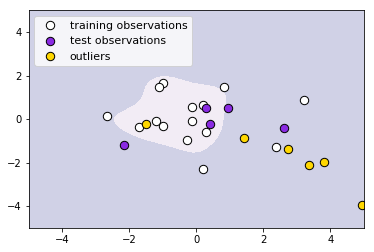

In [873]:
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

s = 70
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(x_out[:, 0], x_out[:, 1], c='gold', s=s,
                edgecolors='k')

plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           [ "training observations",
            "test observations", "outliers"],
           loc="upper left",
           prop=mp.font_manager.FontProperties(size=11))
plt.show()

## One Class SVM scikitlearn

In [874]:
from sklearn import svm

In [875]:
clf = svm.OneClassSVM(kernel = 'rbf', gamma = gamma)
clf.fit(X_train, y_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1257360775345962,
      kernel='rbf', max_iter=-1, nu=0.5, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [876]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_test

array([ 1,  1, -1,  1, -1], dtype=int64)

In [877]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size

In [878]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [879]:
clf.predict(X_test)

array([ 1,  1, -1,  1, -1], dtype=int64)

In [880]:
y_pred_test

array([ 1,  1, -1,  1, -1], dtype=int64)

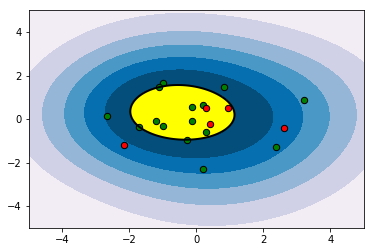

In [881]:
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='yellow')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=s,
                 edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.show()

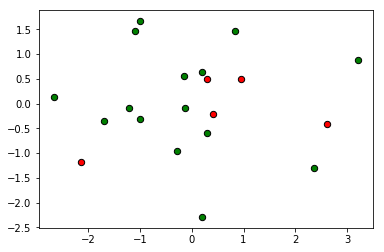

In [882]:
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='green', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=s, edgecolors='k')
plt.show()